In [45]:
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")


from datetime import datetime
import time
import tweepy
import re

In [46]:
df=pd.read_csv('Tweets.csv')


In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [49]:
df.shape

(27481, 4)

In [50]:
df.info

<bound method DataFrame.info of            textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have resp

**Checking for missing values**


In [51]:
print(df.isnull().sum())

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64


**Remove unwanted columns**

In [52]:
# remove selected_text column, because we looking only on text column
df.drop('selected_text', axis=1, inplace=True)

In [53]:
df

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,positive
27479,ed167662a5,But it was worth it ****.,positive


In [54]:
df.drop('textID', axis=1, inplace=True)

In [55]:
df

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


***EDA***

In [56]:
df['sentiment'].value_counts()



neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

<AxesSubplot:>

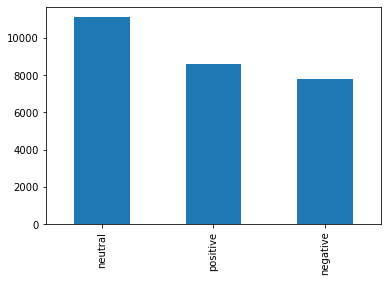

In [57]:
df['sentiment'].value_counts().plot(kind='bar')



In [58]:
df.describe()

,text,sentiment
count,27480,27481
unique,27480,3
top,my twitter has been hacked again,neutral
freq,1,11118


In [59]:
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [60]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/melodyrastegar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***Preprocessing***


In [61]:
#remove punctuation and stopwords.
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    pat = r"[{}]".format(string.punctuation) 
    text = re.sub(pat, ' ', text) 
    text = re.sub('  +', ' ', text) 
    text = re.sub('https?://|www\.', '', text)  
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) 
    
    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [62]:
df['text'] = df['text'].apply(lambda row: clean_text(row))
df.head()

,text,sentiment
0,responded going,neutral
1,sooo sad miss san diego,negative
2,boss bullying,negative
3,interview leave alone,negative
4,sons put releases already bought,negative


***Separating the target variable from other variables***

In [63]:
X = df.drop(columns='sentiment')


# Create y(dependent varibale)

Y=df['sentiment']

***Split data to Train and Test***


In [64]:
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

In [65]:
X.shape

(27481, 1)

In [66]:
Y.shape

(27481,)

***Feature Extraction***


We will be using TfidfVectorizer module from sklearn library

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(X_train['text'])



<19236x19367 sparse matrix of type '<class 'numpy.float64'>'
	with 131286 stored elements in Compressed Sparse Row format>

In [68]:
X_train= vectorizer.transform(X_train['text']
                    )
X_test= vectorizer.transform(X_test['text'])


In [69]:
from sklearn.linear_model import LogisticRegression


In [90]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['neutral', 'negative','positive'], yticklabels=['neutral', 'negative','positive'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Model Building**

In [91]:
log_reg= LogisticRegression(multi_class="ovr", solver="newton-cg") 


In [92]:
log_reg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='newton-cg')

              precision    recall  f1-score   support

    negative       0.85      0.69      0.77      5499
     neutral       0.72      0.86      0.78      7726
    positive       0.85      0.78      0.81      6011

    accuracy                           0.79     19236
   macro avg       0.81      0.78      0.79     19236
weighted avg       0.80      0.79      0.79     19236



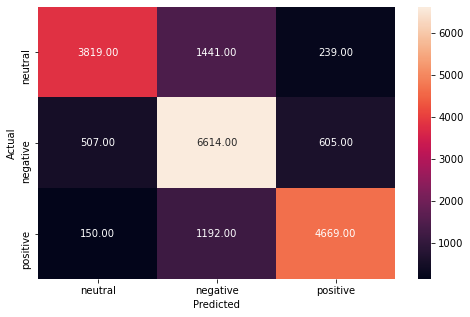

In [93]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score


y_pred_train = log_reg.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

    negative       0.72      0.58      0.64      2282
     neutral       0.63      0.76      0.69      3392
    positive       0.78      0.70      0.73      2571

    accuracy                           0.69      8245
   macro avg       0.71      0.68      0.69      8245
weighted avg       0.70      0.69      0.69      8245



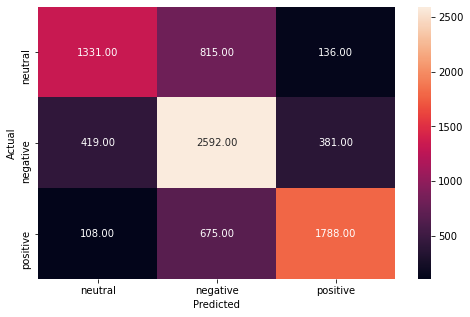

In [94]:
y_pred_test = log_reg.predict(X_test)
metrics_score(y_test, y_pred_test)

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

    negative       0.85      0.69      0.77      5499
     neutral       0.72      0.86      0.78      7726
    positive       0.85      0.78      0.81      6011

    accuracy                           0.79     19236
   macro avg       0.81      0.78      0.79     19236
weighted avg       0.80      0.79      0.79     19236



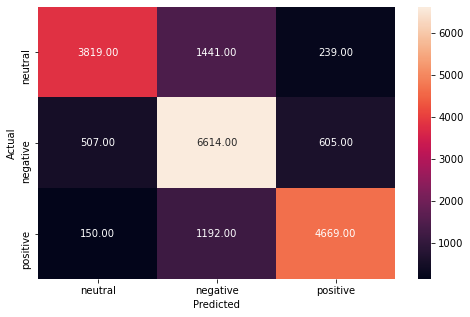

In [97]:
y_pred_train2 = log_reg.predict(X_train)
metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

    negative       0.72      0.58      0.64      2282
     neutral       0.63      0.76      0.69      3392
    positive       0.78      0.70      0.73      2571

    accuracy                           0.69      8245
   macro avg       0.71      0.68      0.69      8245
weighted avg       0.70      0.69      0.69      8245



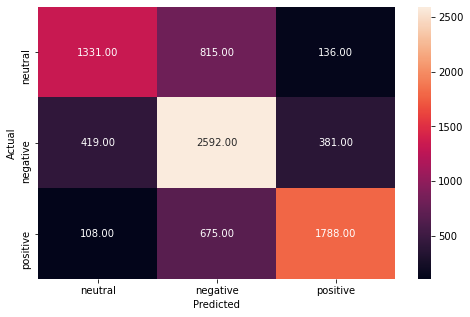

In [98]:
y_pred_test2 = log_reg.predict(X_test)
metrics_score(y_test, y_pred_test2)

In [99]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [100]:
nb.fit(X_train,y_train)

MultinomialNB()

              precision    recall  f1-score   support

    negative       0.93      0.65      0.77      5499
     neutral       0.71      0.93      0.80      7726
    positive       0.89      0.78      0.83      6011

    accuracy                           0.80     19236
   macro avg       0.84      0.79      0.80     19236
weighted avg       0.83      0.80      0.80     19236



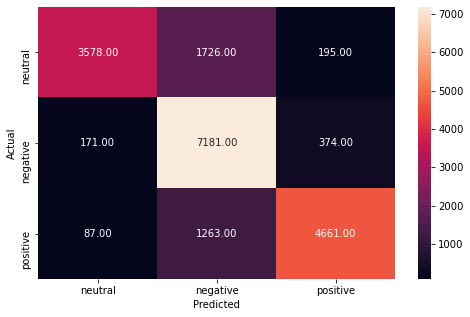

In [101]:
y_pred_train3 = nb.predict(X_train)
metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

    negative       0.76      0.42      0.54      2282
     neutral       0.56      0.81      0.66      3392
    positive       0.75      0.60      0.67      2571

    accuracy                           0.63      8245
   macro avg       0.69      0.61      0.62      8245
weighted avg       0.67      0.63      0.63      8245



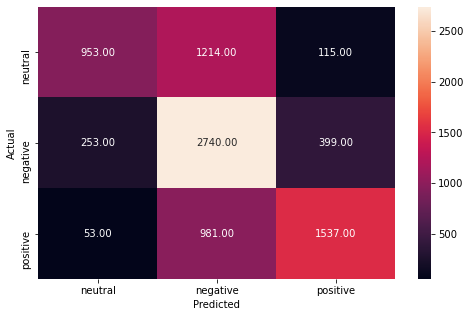

In [102]:
y_pred_test3 = nb.predict(X_test)
metrics_score(y_test, y_pred_test3)